## LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

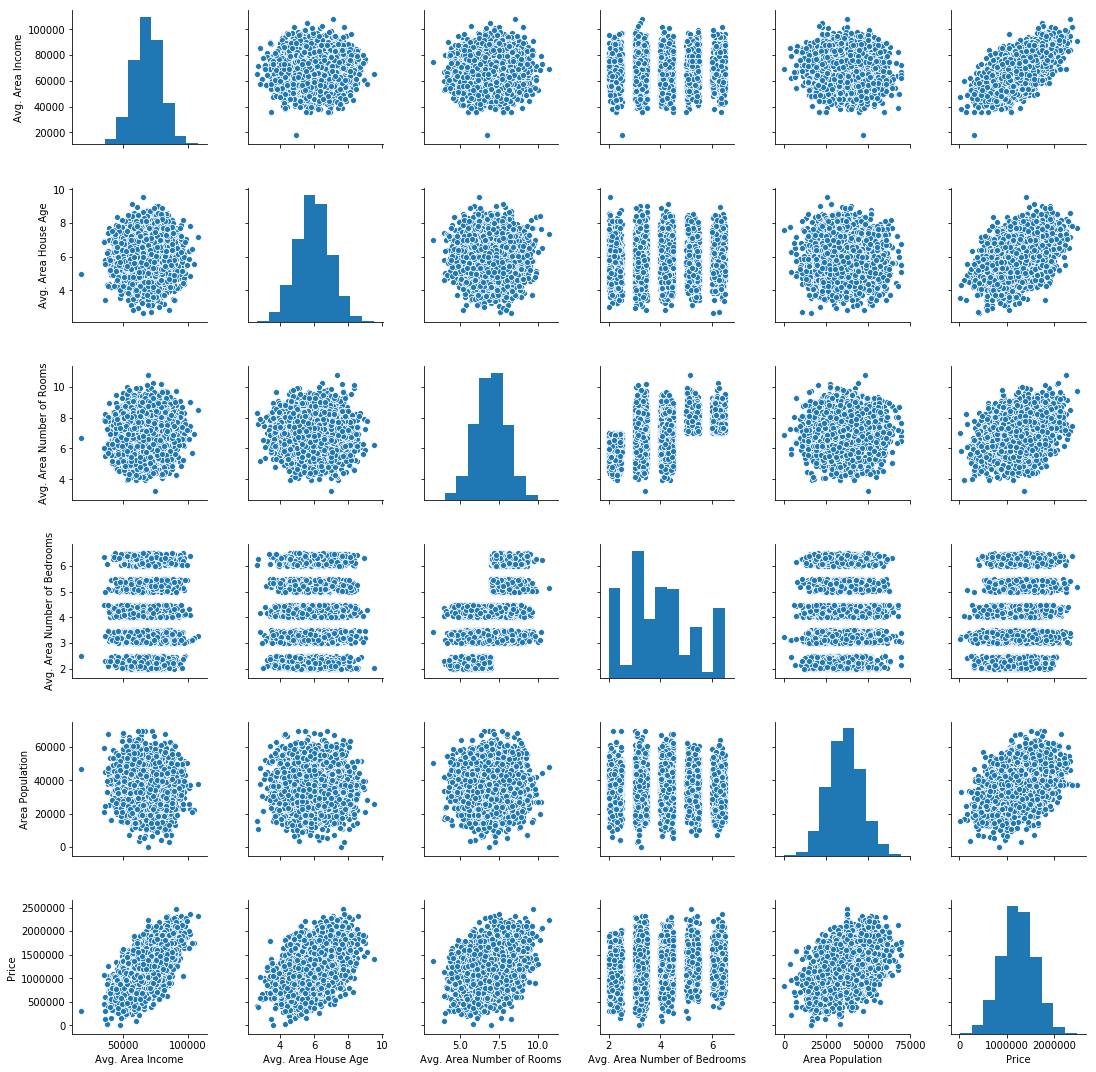

In [12]:
sns.pairplot(df)

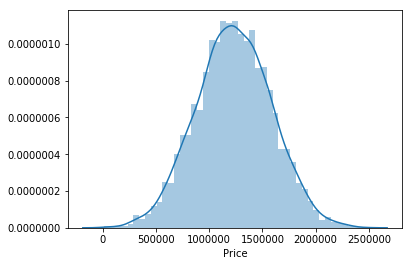

In [13]:
sns.distplot(df['Price'])

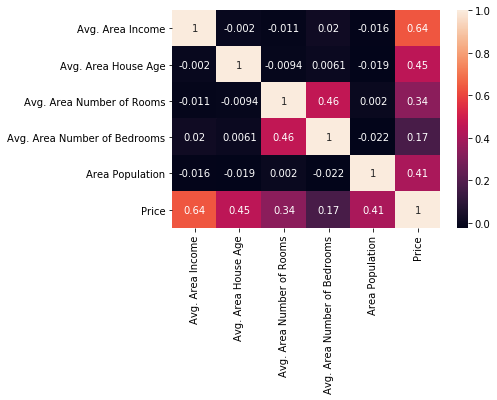

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
 df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [22]:
y = df['Price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print(lm.intercept_)

-2640159.796851911


In [32]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [31]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [33]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [34]:
cdf.head() ## if all units are fixed then the price will rise by coeff 
##eg : avg area income increased by one unit will make the price rise by 21.5 usd

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## PREDICTIONS IN LINEAR REGRESSION

In [35]:
predictions = lm.predict(X_test)

In [36]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

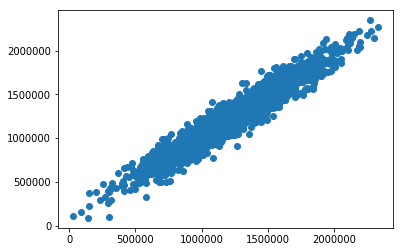

In [37]:
plt.scatter(y_test,predictions)

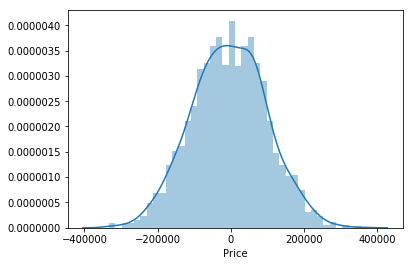

In [51]:
sns.distplot((y_test-predictions),bins=40)

## REGRESSION EVALUATION METRICS

In [41]:
from sklearn import metrics

In [42]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914957

In [43]:
metrics.mean_squared_error(y_test,predictions)

10460958907.209507

In [44]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291156

In [52]:
metrics.explained_variance_score(y_test,predictions) ##higher variance good model 
## must know when to tradeoff between bias and variance so no overfitting or underfitting the data

0.9178179926151797

## LOGISTIC REGRESSION

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
train = pd.read_csv('titanic_train.csv')

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


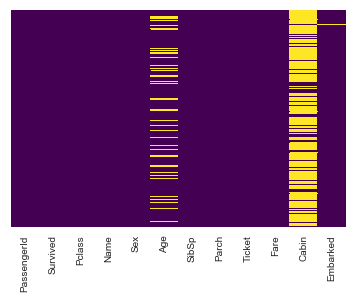

In [89]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
## yellow bars show data absent while spacing shows data present 

In [90]:
sns.set_style('whitegrid')

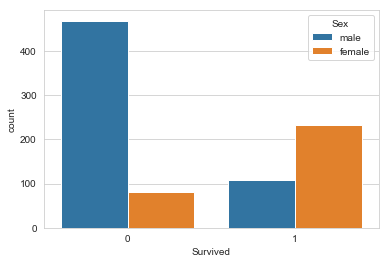

In [91]:
sns.countplot(x='Survived',data=train,hue='Sex')

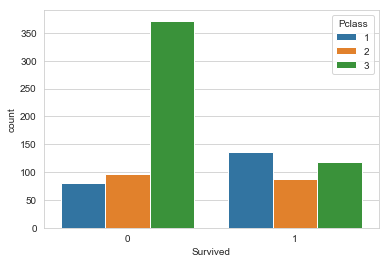

In [92]:
sns.countplot(x='Survived',data=train,hue='Pclass')

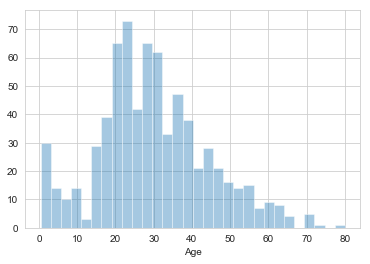

In [93]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


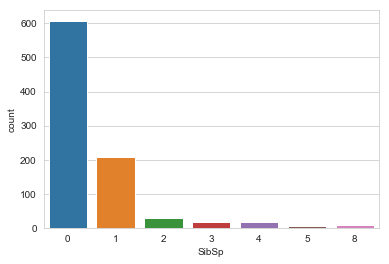

In [95]:
sns.countplot(x='SibSp',data=train)

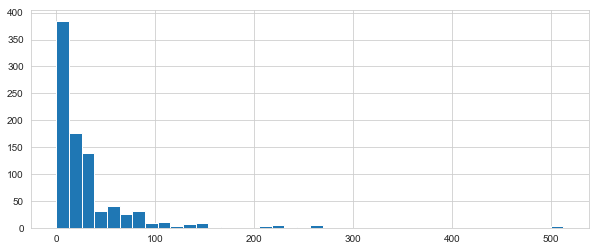

In [96]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [97]:
import cufflinks as cf

In [98]:
cf.go_offline()

In [99]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

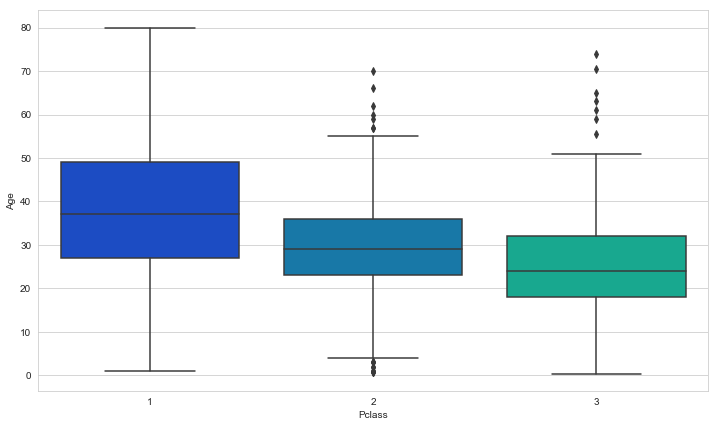

In [100]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [101]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [102]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1) 
## filling in empty age rows with appropriate avg values

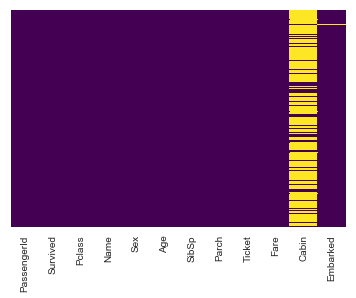

In [103]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [104]:
train.drop('Cabin',axis=1,inplace=True) ## dropping cabin as too many absent values

In [105]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


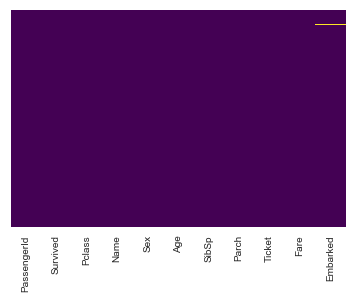

In [106]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
train.dropna(inplace=True) ##dropping any unknown values

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [109]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [110]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [111]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [112]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [113]:
train = pd.concat([train,sex,embark],axis=1)

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [115]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [116]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [117]:
train.drop('PassengerId',axis=1,inplace=True)

In [118]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [119]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

In [122]:
from sklearn.linear_model import LogisticRegression

In [125]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
predictions = logmodel.predict(X_test)

In [127]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

## K NEAREST NEIGHBOURS (KNN)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data',index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [16]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [21]:
## Elbow method to choose K Values 

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) ## taking average of wrong predictions 

Text(0, 0.5, 'Error Rate')

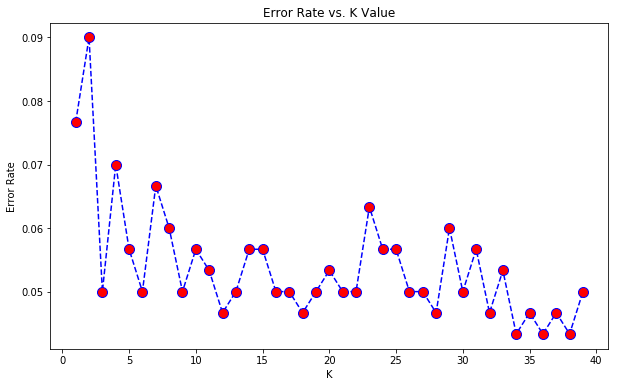

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))  ##as error rate lowon 17

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [26]:
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))  ##as error rate lowon 34 but for 0.01 percent increase too much increase in k so
## shouldnt shoose 34

[[153   6]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## DECISION TREES AND RANDOM FORESTS

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


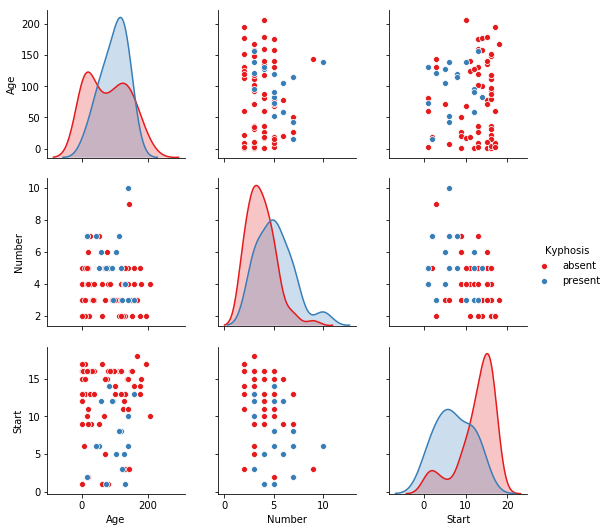

In [29]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [30]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      0.81      0.85        21
     present       0.33      0.50      0.40         4

   micro avg       0.76      0.76      0.76        25
   macro avg       0.61      0.65      0.62        25
weighted avg       0.80      0.76      0.78        25



[[17  4]
 [ 2  2]]


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=200)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.89        21
     present       0.00      0.00      0.00         4

   micro avg       0.80      0.80      0.80        25
   macro avg       0.42      0.48      0.44        25
weighted avg       0.70      0.80      0.75        25



[[20  1]
 [ 4  0]]


In [42]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [45]:
##dot_data = StringIO()  
 ## export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
##graph = pydot.graph_from_dot_data(dot_data.getvalue())  
## Image(graph[0].create_png()) 
########## NEED TO DOWNLOAD GRAPHVIZ SOFTWARE FOR THIS BUT NOT REQD

## SUPPORT VECTOR MACHINES 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [9]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_feat
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC()

In [18]:
model.fit(X_train,y_train)

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))

[[  0  66]
 [  0 105]]


In [23]:
print(classification_report(y_test,predictions)) ## everything classified into class 1 so we need more refining of the data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

   micro avg       0.61      0.61      0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



C:\Users\divya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} ## c is cost 
##gamma is kernel coordinator 

In [26]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [27]:
grid.fit(X_train,y_train)

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ................................

[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.8947368421052632, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=r

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [28]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [29]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
grid_predictions = grid.predict(X_test)

In [31]:
print(confusion_matrix(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]


In [33]:
print(classification_report(y_test,grid_predictions)) ## better variance and bias leading to better accuracy

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



## K MEANS CLUSTERING 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [4]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [6]:
data[0].shape

(200, 2)

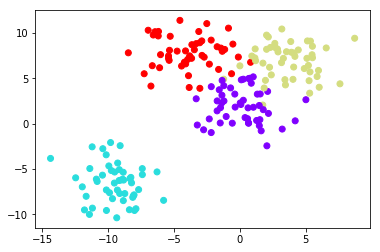

In [7]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=4) ## k can have difficult values

In [10]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [12]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

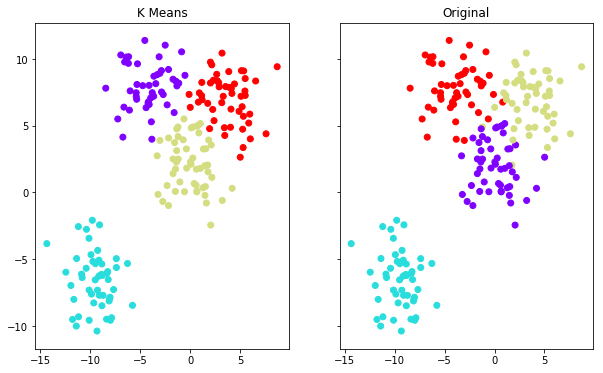

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## PRINCIPAL COMPONENT ANALYSIS

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer = load_breast_cancer()

In [18]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [20]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [21]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaler.fit(df) ##fitting it into 2 components instead of 30

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_data = scaler.transform(df)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)

In [27]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
x_pca = pca.transform(scaled_data)

In [29]:
scaled_data.shape

(569, 30)

In [36]:
x_pca.shape ## only 2 now

(569, 2)

Text(0, 0.5, 'Second Principal Component')

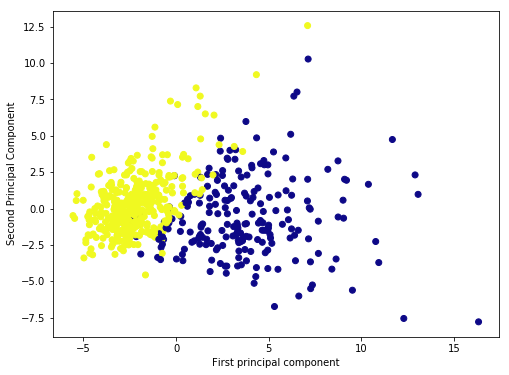

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [32]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [33]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

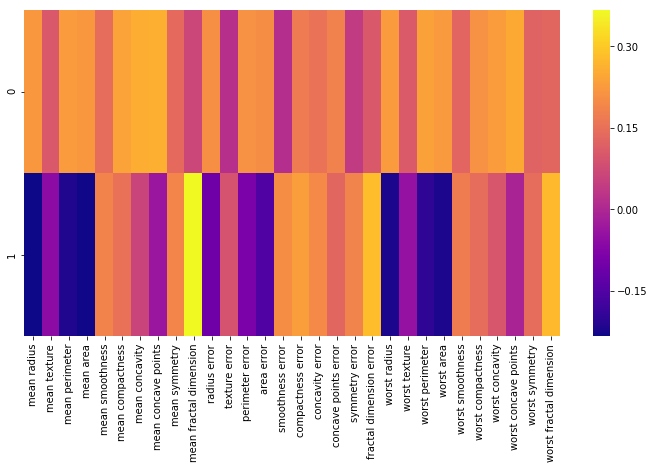

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

## RECOMMENDER SYSTEMS

In [38]:
import numpy as np
import pandas as pd

In [39]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [40]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [41]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [42]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [44]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [45]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [46]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [47]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


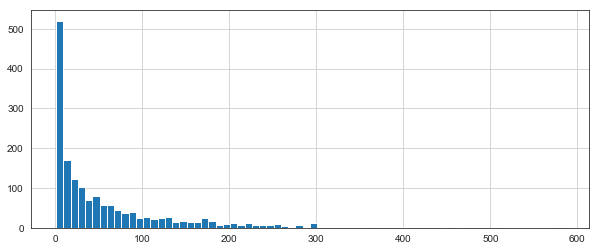

In [48]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

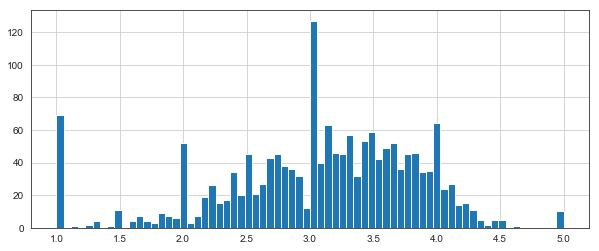

In [49]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

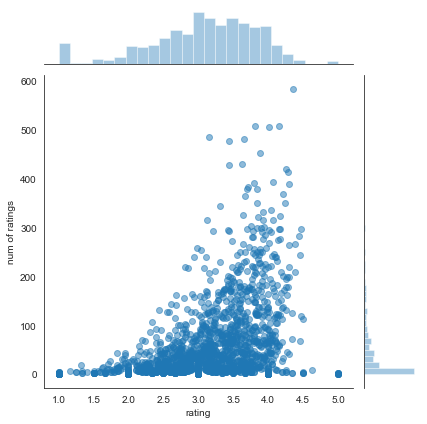

In [50]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [51]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [53]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [54]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\divya\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\divya\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [55]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [56]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [57]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [58]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [62]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>80].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101


## NATURAL LANGUAGE PROCESSING

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\divya\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwaords


    Error loading stopwaords: Package 'stopwaords' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\divya\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [6]:
import pandas as pd

In [7]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

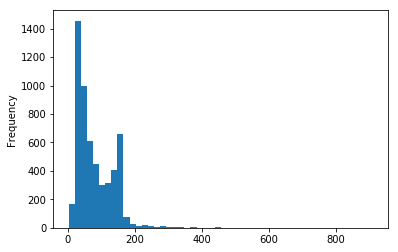

In [12]:
messages['length'].plot(bins=50, kind='hist') 

In [13]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA2C873C50>,
      dtype=object)

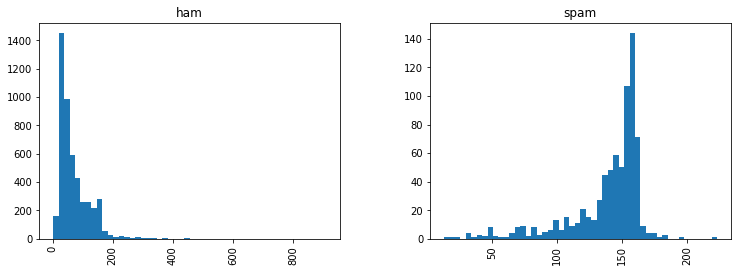

In [15]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [17]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [18]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [20]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [22]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [25]:
# Show original dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [28]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [29]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [32]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554]) ## words occuring twice

U
say


In [33]:
messages_bow = bow_transformer.transform(messages['message'])

In [34]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [36]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [37]:
 from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [38]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [39]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [40]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [41]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [42]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [43]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [44]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [46]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001EA2CD540D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [47]:
predictions = pipeline.predict(msg_test)

In [48]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1524
        spam       0.69      1.00      0.82       148

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



## KERAS 

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('fake_reg.csv')

In [7]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

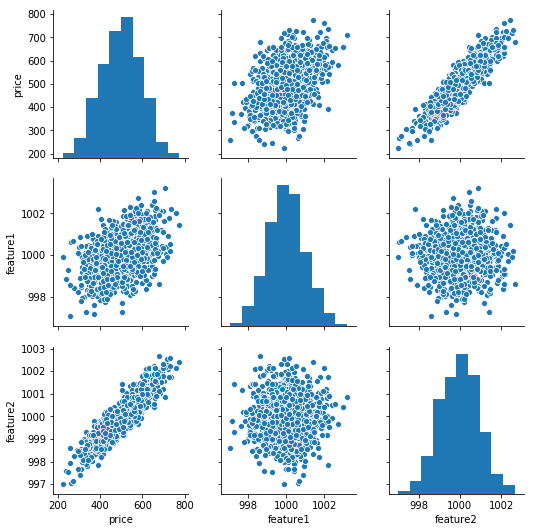

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:

y_test.shape

(300,)

In [15]:
y_train.shape

(700,)

In [16]:
from sklearn.preprocessing import MinMaxScaler ## normalise or scale the data 

In [17]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train) ## prevent data leak

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
import tensorflow as tf

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [33]:
## EXAMPLE OF CREATING A MODEL THROUGH METHOD 1
 ## model = Sequential([
##    Dense(units=2),
#    Dense(units=2),
##   Dense(units=2)
## ])

In [34]:
## neurons to neurons connected above

In [35]:
## EXAMPLE OF CREATING A MODEL USING METHOD 2 
## model = Sequential()

##model.add(Dense(2))
##model.add(Dense(2))
##model.add(Dense(2)) ## second method as it is convenient 

In [36]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse') 
#### For a multi-class classification problem  loss='categorical_crossentropy'
# For a binary classification problem  loss='binary_crossentropy',
# For a mean squared error regression problem  loss='mse'

In [37]:
model.fit(x = X_train,y= y_train,epochs=250) ##go thru the model 250 times -- epochs

Epoch 1/250
22/22 [==============================] - 0s 953us/step - loss: 256735.9375
Epoch 2/250
22/22 [==============================] - 0s 635us/step - loss: 256591.0469
Epoch 3/250
22/22 [==============================] - 0s 725us/step - loss: 256449.2500
Epoch 4/250
22/22 [==============================] - 0s 725us/step - loss: 256257.9688
Epoch 5/250
22/22 [==============================] - 0s 861us/step - loss: 255943.9531
Epoch 6/250
22/22 [==============================] - 0s 771us/step - loss: 255590.0781
Epoch 7/250
22/22 [==============================] - 0s 907us/step - loss: 255205.5781
Epoch 8/250
22/22 [==============================] - 0s 952us/step - loss: 254784.8438
Epoch 9/250
22/22 [==============================] - 0s 635us/step - loss: 254329.0781
Epoch 10/250
22/22 [==============================] - 0s 816us/step - loss: 253834.3125
Epoch 11/250
22/22 [==============================] - 0s 589us/step - loss: 253291.0156
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 816us/step - loss: 1007.8647
Epoch 95/250
22/22 [==============================] - 0s 816us/step - loss: 978.5995
Epoch 96/250
22/22 [==============================] - 0s 770us/step - loss: 952.3951
Epoch 97/250
22/22 [==============================] - 0s 725us/step - loss: 922.7052
Epoch 98/250
22/22 [==============================] - 0s 816us/step - loss: 895.2298
Epoch 99/250
22/22 [==============================] - 0s 816us/step - loss: 862.8237
Epoch 100/250
22/22 [==============================] - 0s 816us/step - loss: 841.1343
Epoch 101/250
22/22 [==============================] - 0s 816us/step - loss: 812.7003
Epoch 102/250
22/22 [==============================] - 0s 861us/step - loss: 785.7981
Epoch 103/250
22/22 [==============================] - 0s 816us/step - loss: 757.7508
Epoch 104/250
22/22 [==============================] - 0s 680us/step - loss: 730.7582
Epoch 105/250
22/22 [==============================] - 0s 861us/step - l

22/22 [==============================] - 0s 635us/step - loss: 24.4808
Epoch 190/250
22/22 [==============================] - 0s 722us/step - loss: 24.4841
Epoch 191/250
22/22 [==============================] - 0s 771us/step - loss: 24.6452
Epoch 192/250
22/22 [==============================] - 0s 816us/step - loss: 24.2536
Epoch 193/250
22/22 [==============================] - 0s 680us/step - loss: 24.3481
Epoch 194/250
22/22 [==============================] - 0s 725us/step - loss: 24.7083
Epoch 195/250
22/22 [==============================] - 0s 669us/step - loss: 24.4878
Epoch 196/250
22/22 [==============================] - 0s 816us/step - loss: 24.6383
Epoch 197/250
22/22 [==============================] - 0s 816us/step - loss: 24.0343
Epoch 198/250
22/22 [==============================] - 0s 816us/step - loss: 24.8828
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 24.0976
Epoch 200/250
22/22 [==============================] - 0s 861us/step - loss: 24.3

In [38]:
model.history.history

{'loss': [256735.9375,
  256591.046875,
  256449.25,
  256257.96875,
  255943.953125,
  255590.078125,
  255205.578125,
  254784.84375,
  254329.078125,
  253834.3125,
  253291.015625,
  252695.078125,
  252042.328125,
  251322.28125,
  250515.046875,
  249627.265625,
  248637.921875,
  247549.078125,
  246354.3125,
  245053.4375,
  243627.703125,
  242083.125,
  240412.84375,
  238603.90625,
  236641.8125,
  234543.84375,
  232283.90625,
  229862.453125,
  227279.859375,
  224535.71875,
  221618.375,
  218514.078125,
  215204.75,
  211715.703125,
  208035.59375,
  204179.390625,
  200086.078125,
  195823.59375,
  191375.34375,
  186689.71875,
  181796.4375,
  176718.546875,
  171428.5625,
  165942.34375,
  160301.578125,
  154459.0,
  148477.109375,
  142290.34375,
  135913.171875,
  129412.390625,
  122799.2265625,
  116054.328125,
  109201.3359375,
  102287.28125,
  95336.328125,
  88325.9453125,
  81324.3515625,
  74325.4609375,
  67393.828125,
  60542.47265625,
  53916.9609375,
  

In [39]:
loss_df = pd.DataFrame(model.history.history)

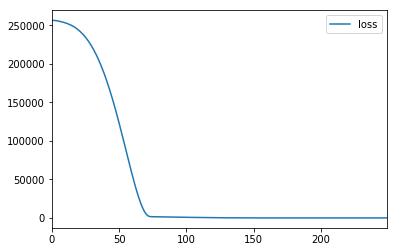

In [40]:
loss_df.plot()

In [41]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [42]:
training_score

23.81127166748047

In [43]:
test_score

25.4666805267334

In [44]:
test_predictions = model.predict(X_test)

In [45]:
test_predictions

array([[405.74683],
       [624.3319 ],
       [592.88745],
       [572.9134 ],
       [366.96384],
       [579.89606],
       [515.6294 ],
       [459.66727],
       [549.898  ],
       [448.06573],
       [612.5614 ],
       [549.6736 ],
       [419.5745 ],
       [409.3207 ],
       [652.12946],
       [437.8199 ],
       [509.1097 ],
       [660.73694],
       [663.4176 ],
       [566.261  ],
       [334.54984],
       [445.34872],
       [382.92963],
       [379.17374],
       [567.29675],
       [611.3385 ],
       [533.0359 ],
       [428.35703],
       [656.2561 ],
       [414.5721 ],
       [443.17038],
       [485.7081 ],
       [438.9264 ],
       [682.7077 ],
       [425.27805],
       [418.14127],
       [502.5872 ],
       [551.16003],
       [510.31247],
       [395.75137],
       [619.38745],
       [417.11792],
       [605.22205],
       [446.5156 ],
       [502.59418],
       [582.49927],
       [669.9043 ],
       [491.01068],
       [318.9261 ],
       [486.00308],


In [46]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [47]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
5,584.381108
6,514.405641
7,464.115870
8,551.650100
9,451.804172


In [48]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [49]:
test_predictions

0      405.746826
1      624.331909
2      592.887451
3      572.913391
4      366.963837
5      579.896057
6      515.629395
7      459.667267
8      549.898010
9      448.065735
10     612.561401
11     549.673584
12     419.574493
13     409.320709
14     652.129456
15     437.819885
16     509.109711
17     660.736938
18     663.417603
19     566.260986
20     334.549835
21     445.348724
22     382.929626
23     379.173737
24     567.296753
25     611.338501
26     533.035889
27     428.357025
28     656.256104
29     414.572113
          ...    
270    565.240417
271    448.545624
272    535.084534
273    382.223785
274    502.134247
275    637.907715
276    497.191345
277    569.090149
278    470.656708
279    273.614594
280    517.981445
281    622.189941
282    350.889191
283    450.943451
284    499.879852
285    543.648071
286    612.628601
287    388.574310
288    449.891693
289    483.006012
290    599.065430
291    499.954926
292    321.790161
293    555.837952
294    445

In [50]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [51]:
pred_df.columns = ['Test Y','Model Predictions']

In [52]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.746826
1,624.156198,624.331909
2,582.455066,592.887451
3,578.588606,572.913391
4,371.224104,366.963837
5,584.381108,579.896057
6,514.405641,515.629395
7,464.115870,459.667267
8,551.650100,549.898010
9,451.804172,448.065735


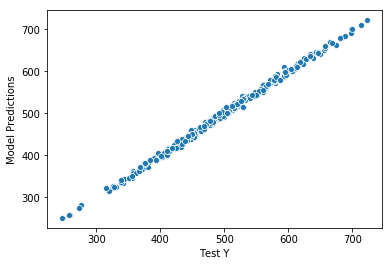

In [53]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [54]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

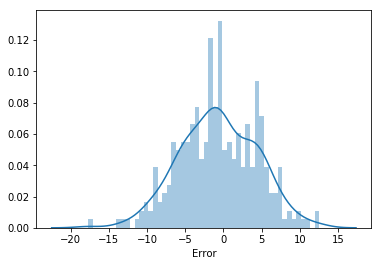

In [55]:
sns.distplot(pred_df['Error'],bins=50)

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.064743706019788

In [58]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.466681455996792

In [59]:
test_score

25.4666805267334

In [60]:
test_score**0.5

5.046452271322241

In [62]:
df.describe() ## we are only off by 4 usd that is about less than 1% of the mean price so the model is good 

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [63]:
new_gem = [[998,1000]] ## predicting for new gem

In [64]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [65]:
new_gem = scaler.transform(new_gem)

In [66]:
model.predict(new_gem)

array([[420.119]], dtype=float32)

In [68]:
## saving and loading a model for later
## from tensorflow.keras.models import load_model
## model.save('my_model.h5') 
## later_model = load_model('my_model.h5')
## later_model.predict(new_gem)

In [69]:
## NEW HOUSING PROJECT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('kc_house_data.csv')

In [71]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [72]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


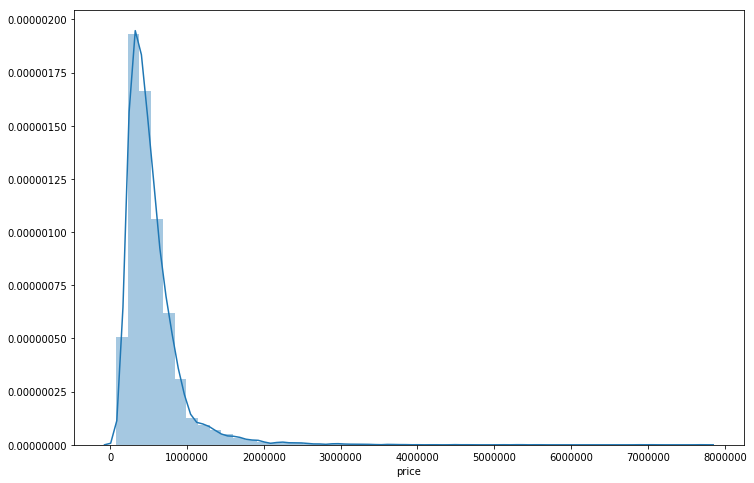

In [73]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

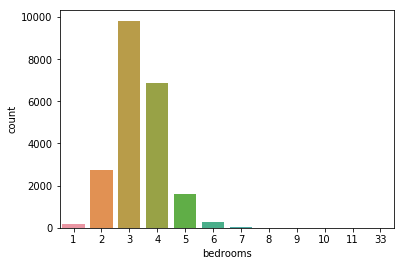

In [74]:
sns.countplot(df['bedrooms'])

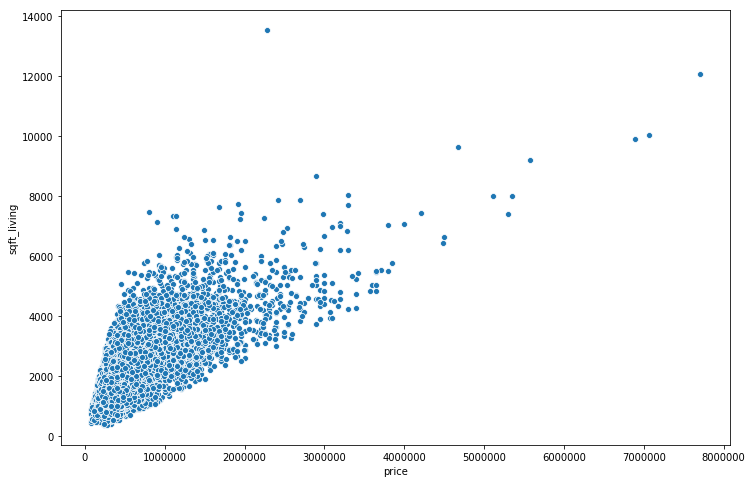

In [75]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

In [77]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

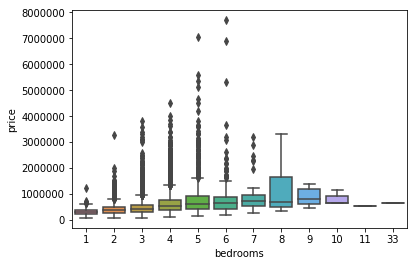

In [78]:
sns.boxplot(x='bedrooms',y='price',data=df)

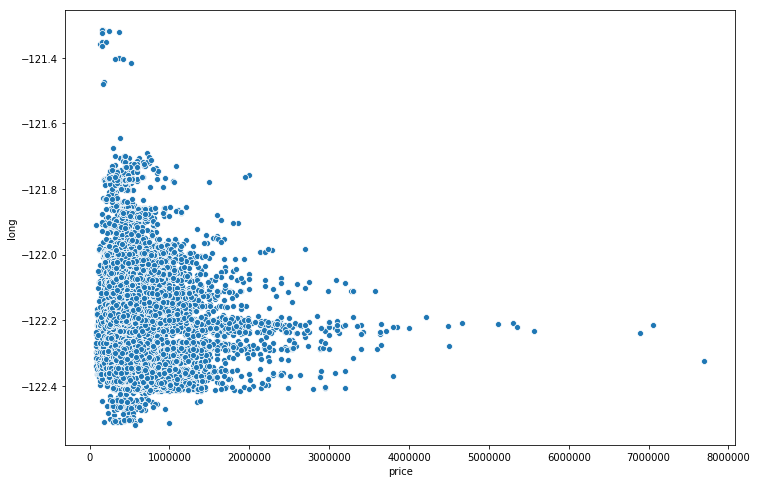

In [79]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

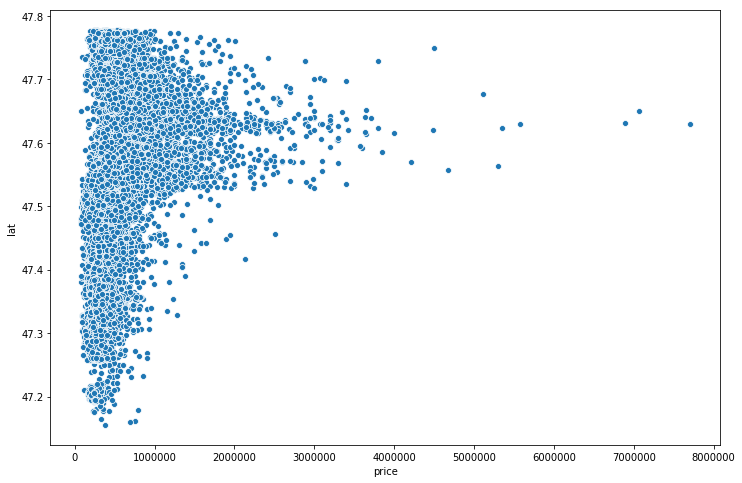

In [80]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

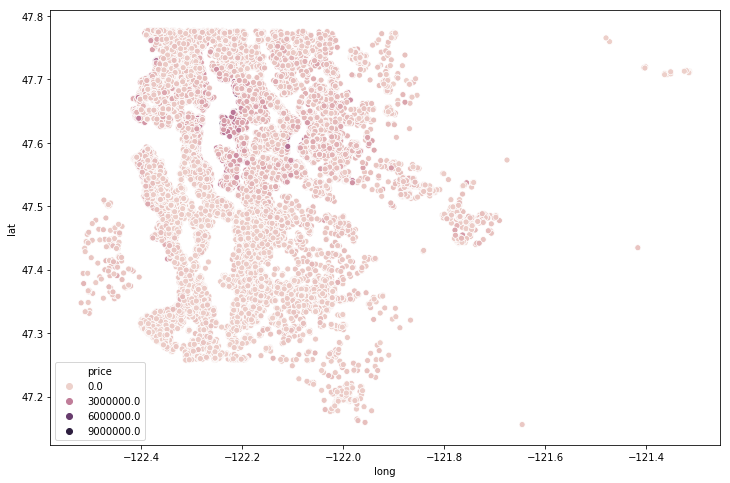

In [81]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [82]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [83]:
len(df)*(0.01)

215.97

In [84]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

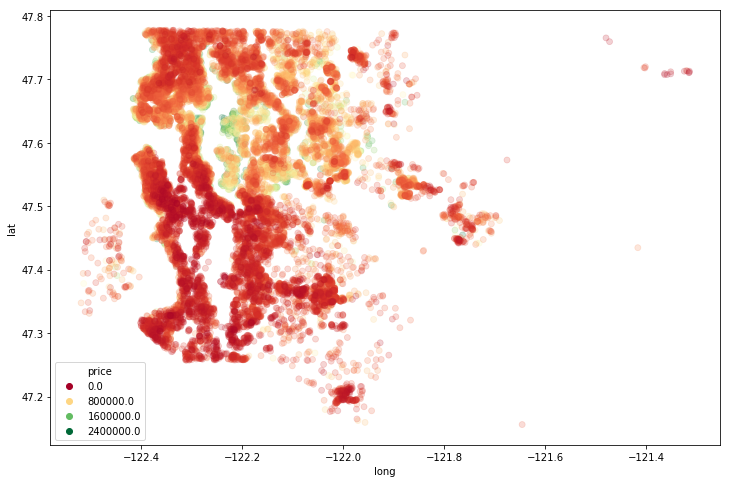

In [86]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',palette='RdYlGn',edgecolor=None,alpha=0.2)

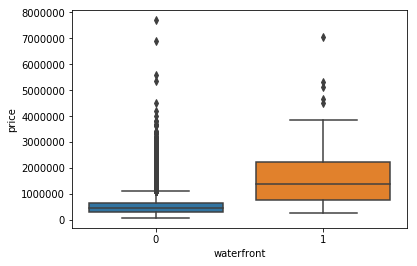

In [87]:
sns.boxplot(x='waterfront',y='price',data=df)

In [88]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
df = df.drop('id',axis=1)

In [90]:
df['date'] = pd.to_datetime(df['date'])

In [91]:
df['month'] = df['date'].apply(lambda date:date.month)

In [92]:
df['year'] = df['date'].apply(lambda date:date.year)

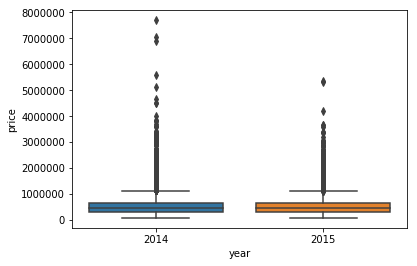

In [93]:
sns.boxplot(x='year',y='price',data=df)

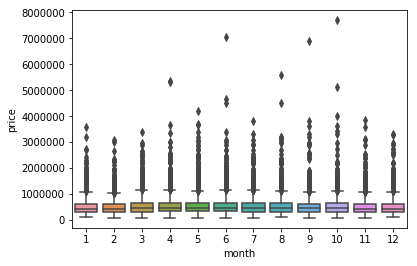

In [94]:
sns.boxplot(x='month',y='price',data=df)

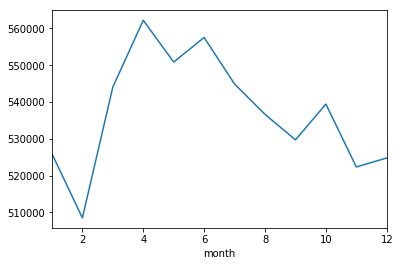

In [95]:
df.groupby('month').mean()['price'].plot()

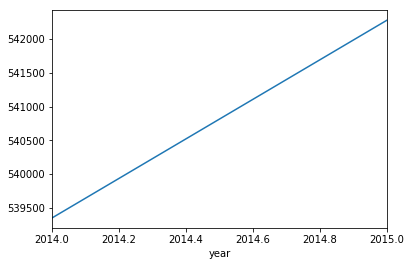

In [96]:
df.groupby('year').mean()['price'].plot()

In [97]:
df = df.drop('date',axis=1)

In [98]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [99]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [100]:
df = df.drop('zipcode',axis=1)

In [101]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [102]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [103]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [115]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
scaler = MinMaxScaler()

In [120]:
X_train= scaler.fit_transform(X_train)

In [121]:
X_test = scaler.transform(X_test)

In [122]:
X_train.shape

(15117, 19)

In [123]:
X_test.shape

(6480, 19)

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [125]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [126]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430233157632.0000 - val_loss: 418868068352.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 428323864576.0000 - val_loss: 412087255040.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 400566321152.0000 - val_loss: 349284597760.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 278539239424.0000 - val_loss: 176499212288.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 126119690240.0000 - val_loss: 96025362432.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 97866981376.0000 - val_loss: 93644201984.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 95656452096.0000 - val_loss: 91561787392.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 93457473536.0000 - val_loss: 89420414976.0000
Epoch 9/400
119/119 [==

119/119 [==============================] - 0s 2ms/step - loss: 36682878976.0000 - val_loss: 35522408448.0000
Epoch 67/400
119/119 [==============================] - 0s 2ms/step - loss: 36581629952.0000 - val_loss: 35386888192.0000
Epoch 68/400
119/119 [==============================] - 0s 2ms/step - loss: 36481318912.0000 - val_loss: 35279540224.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 36387708928.0000 - val_loss: 35174838272.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 36326506496.0000 - val_loss: 35175735296.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36227133440.0000 - val_loss: 35075145728.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 36140224512.0000 - val_loss: 34892136448.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 35978387456.0000 - val_loss: 35001643008.0000
Epoch 74/400
119/119 [===============

Epoch 133/400
119/119 [==============================] - 0s 2ms/step - loss: 32704053248.0000 - val_loss: 31119532032.0000
Epoch 134/400
119/119 [==============================] - 0s 2ms/step - loss: 32685635584.0000 - val_loss: 31087699968.0000
Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32669229056.0000 - val_loss: 31061186560.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32621901824.0000 - val_loss: 31103744000.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32622645248.0000 - val_loss: 31175577600.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32535463936.0000 - val_loss: 30957256704.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32522682368.0000 - val_loss: 30942048256.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32539209728.0000 - val_loss: 30966980608.0000
Epoch 141/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31292825600.0000 - val_loss: 29333923840.0000
Epoch 200/400
119/119 [==============================] - 0s 1ms/step - loss: 31274999808.0000 - val_loss: 29309900800.0000
Epoch 201/400
119/119 [==============================] - 0s 1ms/step - loss: 31268225024.0000 - val_loss: 29326954496.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31257112576.0000 - val_loss: 29290983424.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 31223658496.0000 - val_loss: 29223163904.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 31233286144.0000 - val_loss: 29229174784.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31186774016.0000 - val_loss: 29263951872.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 31209850880.0000 - val_loss: 29143160832.0000
Epoch 207/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30464305152.0000 - val_loss: 28287457280.0000
Epoch 266/400
119/119 [==============================] - 0s 2ms/step - loss: 30438696960.0000 - val_loss: 28318404608.0000
Epoch 267/400
119/119 [==============================] - 0s 1ms/step - loss: 30449733632.0000 - val_loss: 28269047808.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30477291520.0000 - val_loss: 28266317824.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30470670336.0000 - val_loss: 28283541504.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 30465622016.0000 - val_loss: 28270841856.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30459602944.0000 - val_loss: 28270178304.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30417143808.0000 - val_loss: 28236652544.0000
Epoch 273/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29873260544.0000 - val_loss: 27608231936.0000
Epoch 332/400
119/119 [==============================] - 0s 1ms/step - loss: 29873735680.0000 - val_loss: 27663460352.0000
Epoch 333/400
119/119 [==============================] - 0s 1ms/step - loss: 29837522944.0000 - val_loss: 27579754496.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 29851146240.0000 - val_loss: 27579478016.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 29820487680.0000 - val_loss: 27744231424.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 29879461888.0000 - val_loss: 27570952192.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 29865775104.0000 - val_loss: 27549165568.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 29833709568.0000 - val_loss: 27532498944.0000
Epoch 339/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29060907008.0000 - val_loss: 26601723904.0000
Epoch 398/400
119/119 [==============================] - 0s 1ms/step - loss: 28959006720.0000 - val_loss: 26573414400.0000
Epoch 399/400
119/119 [==============================] - 0s 1ms/step - loss: 29034887168.0000 - val_loss: 26518032384.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 28945797120.0000 - val_loss: 26512041984.0000


In [127]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302332e+11,4.188681e+11
1,4.283239e+11,4.120873e+11
2,4.005663e+11,3.492846e+11
3,2.785392e+11,1.764992e+11
4,1.261197e+11,9.602536e+10
5,9.786698e+10,9.364420e+10
6,9.565645e+10,9.156179e+10
7,9.345747e+10,8.942041e+10
8,9.116783e+10,8.719604e+10
9,8.881455e+10,8.485850e+10


In [128]:
losses = pd.DataFrame(model.history.history)

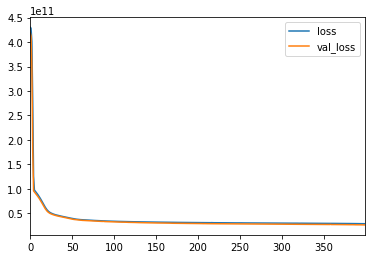

In [129]:
losses.plot()

In [130]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [131]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [132]:
predictions = model.predict(X_test)

In [133]:
mean_absolute_error(y_test,predictions)

99452.51375144676

In [134]:
np.sqrt(mean_squared_error(y_test,predictions))

162825.18771611524

In [135]:
explained_variance_score(y_test,predictions)

0.8001040605007845

In [136]:
df['price'].mean()

540296.5735055795

In [137]:
df['price'].median()

450000.0

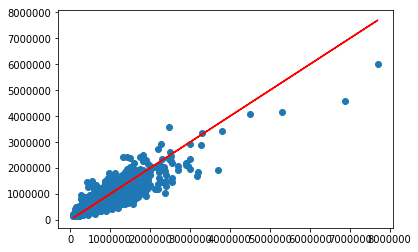

In [138]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [140]:
single_house = df.drop('price',axis=1).iloc[0]

In [141]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [142]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [143]:
model.predict(single_house)

array([[281191.4]], dtype=float32)

In [146]:
df.iloc[0] ## off by 60k usd not that much so have to reshape the whole model and have to stop overfitting by
## early stopping and dropout layers

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [147]:
import pandas as pd
import numpy as np

In [148]:
df = pd.read_csv('cancer_classification.csv')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [150]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

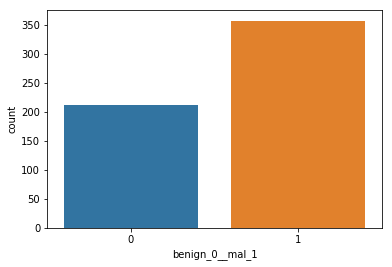

In [152]:
sns.countplot(x='benign_0__mal_1',data=df)

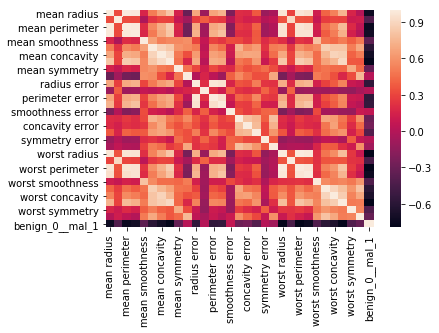

In [153]:
sns.heatmap(df.corr())

In [154]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

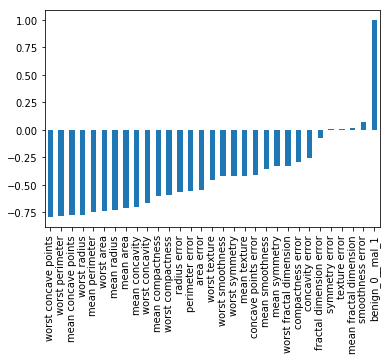

In [155]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

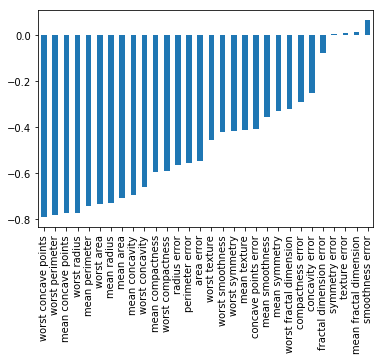

In [156]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [157]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()

In [162]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [163]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [165]:
X_train.shape

(426, 30)

In [166]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [167]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6874 - val_loss: 0.6710
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6567 - val_loss: 0.6426
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6284 - val_loss: 0.6128
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5964 - val_loss: 0.5776
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5566 - val_loss: 0.5323
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5083 - val_loss: 0.4781
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4497 - val_loss: 0.4090
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3846 - val_loss: 0.3496
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3364 - val_loss: 0.3064
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2984 - val_loss: 0.2706
Epoch 11/

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.1183
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.1122
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.1219
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0546 - val_loss: 0.1182
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0551 - val_loss: 0.1127
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.1168
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0511 - val_loss: 0.1152
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.1244
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.1176
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0508 - val_loss: 0.1196


14/14 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.1402
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0385 - val_loss: 0.1273
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0435 - val_loss: 0.1458
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.1343
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.1308
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.1314
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.1357
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.1337
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0448 - val_loss: 0.1401
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.1309
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.1397
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.1458
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0307 - val_loss: 0.1523
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.1395
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.1544
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.1437
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0317 - val_loss: 0.1484
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.1441
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0294 - val_loss: 0.1481
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0308 - val_loss: 0.1467
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.1499
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.1634
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.1613
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.1570
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.1694
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1555
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.1594
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.1578
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.1687
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.1589
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.1759
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.1764
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.1859
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.1755
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.1773
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.1835
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0206 - val_loss: 0.1766
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.1879
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.1794
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.1846
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.2174
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.2089
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.2084
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.2085
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.2082
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.2133
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.2131
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.2073
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.2070
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.2342
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.2709
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.2212
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.2531
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.2380
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.2307
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.2385
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.2460
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.2282
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.2450
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.2368
Epoc

In [168]:
model_loss = pd.DataFrame(model.history.history)

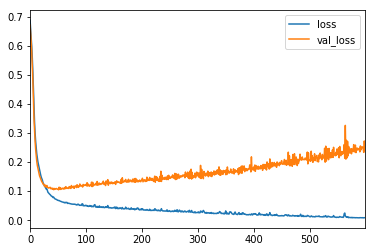

In [169]:
model_loss.plot()

In [170]:
## above is an example of overfitting

In [171]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [172]:
from tensorflow.keras.callbacks import EarlyStopping

In [174]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) 
## minimise the val loss and go till 25 epochs 

In [175]:
model.fit(x=X_train, y=y_train,epochs=600,validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop] )

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6935 - val_loss: 0.6745
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6686 - val_loss: 0.6538
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6461 - val_loss: 0.6318
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6193 - val_loss: 0.6003
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5864 - val_loss: 0.5588
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5352 - val_loss: 0.5041
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4794 - val_loss: 0.4467
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4222 - val_loss: 0.3872
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3679 - val_loss: 0.3342
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3212 - val_loss: 0.2889
Epoch 11/

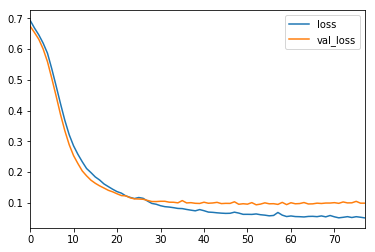

In [176]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [177]:
## above was an early stopping method below is a method of adding dropout layers

In [187]:
from tensorflow.keras.layers import Dropout

In [188]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam') ## 0.5 implies half neurons will be turned off

In [189]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7591 - val_loss: 0.6986
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.7350 - val_loss: 0.6891
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6890 - val_loss: 0.6791
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6883 - val_loss: 0.6611
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6747 - val_loss: 0.6394
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6609 - val_loss: 0.6188
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6256 - val_loss: 0.5897
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6130 - val_loss: 0.5506
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5950 - val_loss: 0.5196
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5463 - val_loss: 0.4844
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1097
Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1118 - val_loss: 0.1086
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1292 - val_loss: 0.1253
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1034 - val_loss: 0.1066
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1114 - val_loss: 0.1115
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1147 - val_loss: 0.1198
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1031 - val_loss: 0.1064
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1176 - val_loss: 0.1041
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1076
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1241 - val_loss: 0.1100
Epoch 92/600


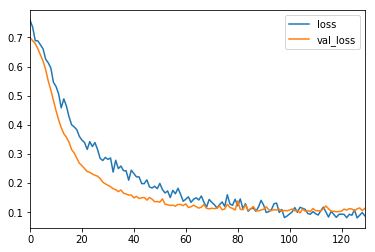

In [190]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot() ## now both are falling and going at the same value for less epochs

In [191]:
predictions = model.predict_classes(X_test)

In [192]:
from sklearn.metrics import classification_report,confusion_matrix

In [193]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [194]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
